<img src='https://pebpung.github.io/assets/img/2021-09-11/AutoEncoder-1/Untitled.png'>

<img src='https://velog.velcdn.com/images/nayeon_p00/post/ea531fd4-9078-467b-b9e6-9f176d2fa0a5/image.png'>

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import Sequential, Model
from tensorflow.keras.optimizers import Adam

plt.rc('font', family='Malgun Gothic')

데이터셋에 있는 모든 변수는 수치 데이터입니다. 데이터는 개인 정보보호 문제로 인해 PCA 변환 과정을 거쳤습니다. 딱 두 가지 변환하지 않은 것은 시간(Time)과 거래액(Amount)입니다. 시간은 데이터셋 내 첫번째 거래가 이루어진 시점부터 각 거래가 이루어진 시점 사이의 시간을 초(second) 단위로 기록한 것

총 284,807 건의 거래데이터가 있으며 각 Column 정보는 아래와 같습니다.

- V1 ~ V28 : 개인정보로 공개되지 않은 값
- Time : 시간
- Amount : 거래금액
- Class : 사기 여부 (1: 사기, 0: 정상)
- 총 31개 Column이 있으며 이 중 시간과 거래금액을 뺀 V1 ~ V28 데이터로 부터 사기 여부(Class)를 예측

In [2]:
df = pd.read_csv('data/creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [3]:
df.shape

(284807, 31)

In [4]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [5]:
LABELS = ["Normal", "Fraud"]

### 컬럼에 null 확인

In [6]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

## 정상 비정상 거래수 확인

In [7]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

<Axes: xlabel='분류', ylabel='거래수'>

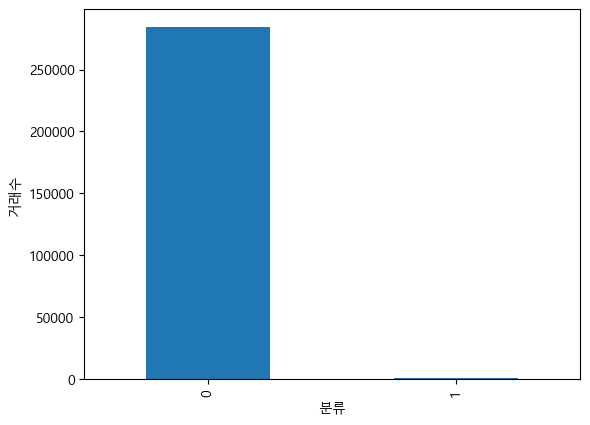

In [8]:
df['Class'].value_counts().plot( kind='bar', ylabel='거래수',xlabel='분류' )

<Axes: ylabel='Class'>

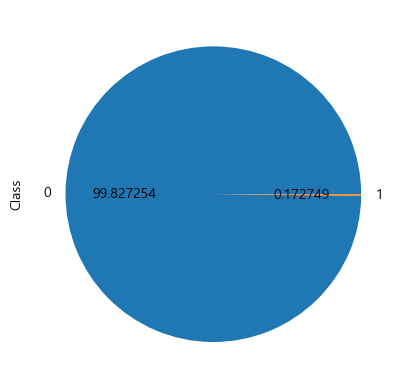

In [9]:
df['Class'].value_counts().plot( kind='pie', autopct='%f')

### 정상거래와 비정상 거래 데이터프레임 분류

In [10]:
frauds = df[ df['Class']==1 ]
normal = df[ df['Class']==0 ]

In [11]:
frauds.shape

(492, 31)

In [12]:
normal.shape

(284315, 31)

### 정규화

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
# stdScale = StandardScaler()
data = df.drop( columns=['Time'] )
stdScale = StandardScaler()
data['Amount'] = stdScale.fit_transform( data['Amount'].values.reshape(-1,1) )

## train test 분류

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train,X_test = train_test_split(data ,test_size=0.2 )

In [17]:
# 정상거래 데이터로 X_train을 구성
X_train = X_train[ X_train['Class']==0 ]
X_train.drop( columns=['Class'] ,inplace=True)

### 정상거래의 train 데이터셋 완성

In [18]:
X_train

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
97346,-0.571288,1.041338,-0.387278,-0.270291,2.217138,3.544165,-0.202079,1.308159,-0.929643,-0.437984,...,0.037924,0.054388,-0.113607,-0.098739,0.988138,-0.058267,-0.398840,0.036315,0.080942,-0.297296
217179,-1.967238,0.554255,-1.299973,-0.256174,0.406781,-1.026290,0.329060,0.463318,-0.369527,-0.113892,...,-0.476551,0.446317,1.480454,0.418463,-0.270901,-0.595308,-0.249885,-0.269762,0.346845,-0.301294
170860,1.877437,-0.280871,-0.971661,1.361902,0.279510,0.600528,-0.154075,0.158697,0.857709,0.132167,...,-0.190473,-0.291126,-0.574839,0.186931,0.260812,0.074207,-0.847572,0.027329,-0.045030,-0.193306
139273,-0.594706,0.114513,1.174700,-2.719161,-0.765407,-0.561110,-0.203208,-0.033307,-2.286526,1.577055,...,-0.080776,-0.124816,0.123826,-0.110309,-0.029142,-0.229608,-0.417971,0.360552,0.262311,-0.333239
261706,-0.636945,1.427841,-0.396971,-0.287650,0.468410,-1.036333,0.687422,0.285131,-0.108600,-1.487623,...,-0.076668,0.068521,0.451934,-0.245942,-0.149547,-0.162394,0.590463,0.258894,0.200336,-0.333279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197267,-2.196399,-0.566425,0.318139,-1.739548,1.864122,4.610533,0.436068,1.017167,0.965939,-1.000817,...,-0.405200,-0.407007,-0.586640,0.022877,0.701225,0.717562,-0.477773,0.079826,0.282853,0.566330
121056,-0.728785,0.875942,2.746940,3.600335,-0.428297,1.733079,0.341788,0.408112,-0.515489,0.321599,...,-0.142936,-0.193070,-0.176526,-0.007535,0.094436,-0.095701,-0.089224,0.020340,0.009879,0.070568
68325,1.313295,0.743211,-0.747210,0.743147,0.476920,-1.140341,0.493613,-0.364560,-0.341693,-0.752380,...,0.034220,-0.170869,-0.364747,-0.161581,-0.188810,0.683951,0.395223,-0.022326,0.040778,-0.350191
112413,-1.885984,1.544625,0.892467,0.108131,-1.479409,0.176344,-1.235871,1.434311,0.015997,-0.604634,...,-0.446744,0.225313,0.097921,0.039288,0.012774,-0.181800,0.219053,-1.031994,-0.168159,-0.334598


In [19]:
X_train.shape

(227452, 29)

### 테스트 데이터

In [20]:
y_test = X_test['Class'].values
x_test = X_test.drop( columns=['Class']).values

In [21]:
x_test.shape

(56962, 29)

### 학습

In [28]:
model = Sequential()
model.add( Dense( units=64, input_dim=29, activation='relu') )
model.add( Dense( units=32, activation='relu') )
model.add( Dense( units=16, activation='relu') )
model.add( Dense( units=16, activation='relu') )
model.add( Dense( units=32, activation='relu') )
model.add( Dense( units=29) )
model.compile(loss='mse', optimizer='adam')
model.fit( X_train, X_train, epochs=30)

Epoch 1/30
7108/7108 [==============================] - 11s 1ms/step - loss: 0.2162
Epoch 2/30
7108/7108 [==============================] - 9s 1ms/step - loss: 0.1026
Epoch 3/30
7108/7108 [==============================] - 9s 1ms/step - loss: 0.0832
Epoch 4/30
7108/7108 [==============================] - 9s 1ms/step - loss: 0.0764
Epoch 5/30
7108/7108 [==============================] - 9s 1ms/step - loss: 0.0719
Epoch 6/30
7108/7108 [==============================] - 9s 1ms/step - loss: 0.0663
Epoch 7/30
7108/7108 [==============================] - 9s 1ms/step - loss: 0.0642
Epoch 8/30
7108/7108 [==============================] - 9s 1ms/step - loss: 0.0593
Epoch 9/30
7108/7108 [==============================] - 9s 1ms/step - loss: 0.0558
Epoch 10/30
7108/7108 [==============================] - 9s 1ms/step - loss: 0.0536
Epoch 11/30
7108/7108 [==============================] - 9s 1ms/step - loss: 0.0515
Epoch 12/30
7108/7108 [==============================] - 9s 1ms/step - loss: 0.0516


In [29]:
pred = model.predict(x_test)
pred

1781/1781 [==============================] - 2s 1ms/step


array([[-0.522005  ,  0.20643842,  1.2982452 , ...,  0.10906059,
         0.23081216, -0.4296326 ],
       [-2.342004  ,  0.59944874,  0.12365079, ...,  0.3494692 ,
         0.24632251,  0.4534555 ],
       [ 1.2493303 , -1.7758754 , -2.1251116 , ..., -0.01406986,
         0.11994228,  0.96664995],
       ...,
       [-0.5862902 , -0.62146294,  2.4032621 , ...,  0.19072145,
         0.21847662, -0.4541865 ],
       [-0.4080956 , -0.02197981,  1.1926187 , ...,  0.12484411,
         0.19049206, -0.40208054],
       [ 1.5538657 , -0.07313168, -0.6622232 , ..., -0.02146273,
         0.04827264, -0.58452153]], dtype=float32)

In [30]:
x_test.shape

(56962, 29)

In [31]:
pred.shape

(56962, 29)

In [32]:
mse = np.mean( (x_test-pred)**2 , axis=1) 

In [33]:
mse.shape

(56962,)

In [36]:
# ex
arr1 = np.array([[1,2],[3,4]])
arr2 = np.array([[5,6],[7,8]])
np.mean( (arr1-arr2)**2, axis=1)

array([16., 16.])

In [38]:
y_test.shape

(56962,)

In [39]:
errDF = pd.DataFrame( {'mse':mse, 'trueClass':y_test} )
errDF

,mse,trueClass
0,0.063951,0
1,0.324088,0
2,0.051373,0
3,0.052816,0
4,0.018043,0
...,...,...
56957,0.023343,0
56958,0.033471,0
56959,0.049534,0
56960,0.074886,0


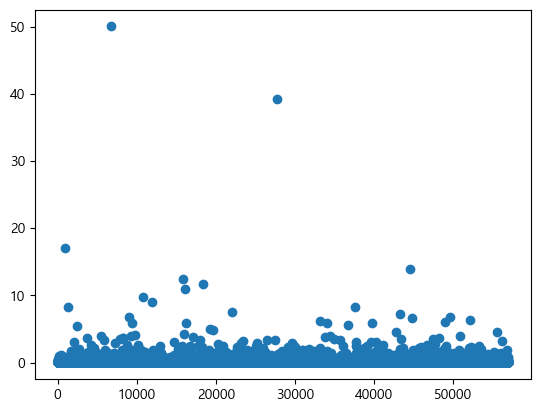

In [40]:
plt.scatter( range(len(errDF)), errDF['mse'] )
plt.show()

In [43]:
False + 0

0

In [79]:
thresh = 3.1

In [80]:
predClass = (errDF['mse'] > thresh) + 0

In [52]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

In [81]:
accuracy_score(errDF['trueClass'], predClass)

0.998121554720691

In [82]:
f1_score(errDF['trueClass'], predClass)

0.30065359477124176

In [87]:
c = confusion_matrix( errDF['trueClass'], predClass)

In [89]:
import seaborn as sb

<Axes: >

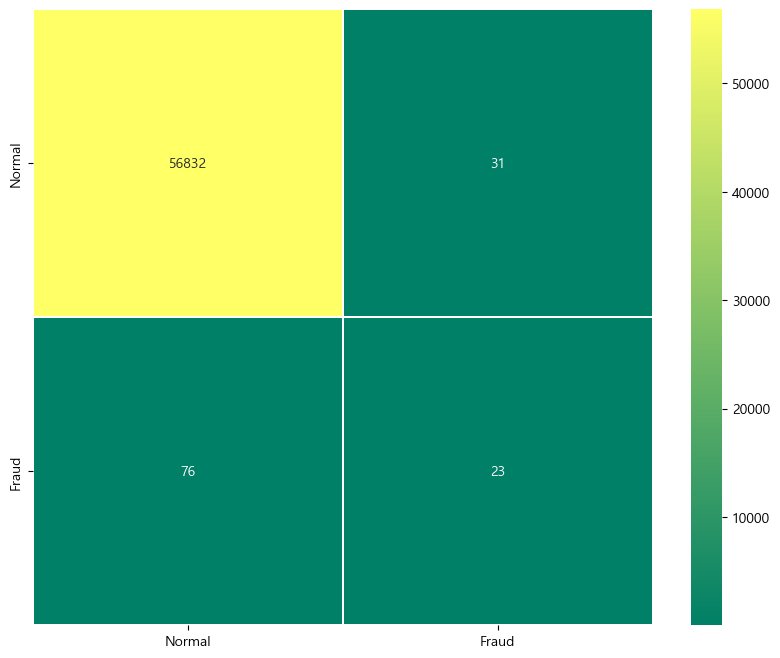

In [90]:
plt.figure( figsize=(10,8))
sb.heatmap( c, cmap='summer', annot=True, linewidths=0.2, fmt='d',
          xticklabels=LABELS, yticklabels=LABELS)

### LSTM 다대다 오토 인코더

In [ ]:
model = Sequential()
model.add(LSTM(128, activation='relu',input_shape=(X.shape[1],X.shape[2]),return_sequences=True))
model.add(LSTM(64, activation='relu',return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=True))
model.add(LSTM(64, activation='relu', return_sequences=True))
#     model.add( BatchNormalization())
model.add(LSTM(128, activation='relu', return_sequences=True))
model.add(TimeDistributed(Dense(X.shape[2])))
model.compile(optimizer='adam', loss='mse')
model.summary()